In [145]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import dateutil.parser
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

## Load data

In [146]:
# Load dataset
twitter_data_all = pd.read_csv('../../data/data_collected_ref_cleaned/2_first_solar_tweets_cleaned_v2.csv')

In [147]:
twitter_data_all.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,First Solar Completes Sale of North American OampM Business to NovaSource FSLR httpstcojlkOFos,"['first', 'solar', 'completes', 'sale', 'of', 'north', 'american', 'oampm', 'business', 'to', 'n...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...","['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ..."
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fun...,"['alyi', 'to', 'reveal', 'new', 'significant', 'investment', 'in', 'company', 'from', 'leading',...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...","['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '..."
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,SolarPowerEU renewableHEU EUCommission AkuoEnergy enelgreenpower EdpRenewables Enapter FirstSola...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'..."
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,FSLR sector move confirmed httpstcohDwnCIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']"
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,FSLR NovaSource Power Services is Worlds Largest Solar OampM Provider with Acquisition of First ...,"['fslr', 'novasource', 'power', 'services', 'is', 'worlds', 'largest', 'solar', 'oampm', 'provid...","['fslr', 'novasource', 'power', 'services', 'worlds', 'largest', 'solar', 'oampm', 'provider', '...","['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...","['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac..."


In [148]:
twitter_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157164 entries, 0 to 157163
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         157164 non-null  object
 1   TweetId           157164 non-null  object
 2   AuthorId          157164 non-null  object
 3   TweetText         157164 non-null  object
 4   Tweet_punct       157164 non-null  object
 5   Tweet_tokenized   157164 non-null  object
 6   Tweet_nonstop     157164 non-null  object
 7   Tweet_stemmed     157164 non-null  object
 8   Tweet_lemmatized  157164 non-null  object
dtypes: object(9)
memory usage: 10.8+ MB


In [149]:
# datetime = pd.to_datetime(twitter_data['CreatedAt'])

## Delete header rows

In [150]:
index_names = twitter_data_all[ twitter_data_all['CreatedAt'] == 'CreatedAt' ].index
index_names

Int64Index([   492,    989,   1208,   1704,   2196,   2665,   3163,   3664,
              4163,   4540,
            ...
            152624, 153118, 153617, 154117, 154615, 155113, 155609, 156105,
            156600, 157096],
           dtype='int64', length=352)

In [151]:
twitter_data_all.drop(index_names, inplace = True)

In [152]:
twitter_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156812 entries, 0 to 157163
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         156812 non-null  object
 1   TweetId           156812 non-null  object
 2   AuthorId          156812 non-null  object
 3   TweetText         156812 non-null  object
 4   Tweet_punct       156812 non-null  object
 5   Tweet_tokenized   156812 non-null  object
 6   Tweet_nonstop     156812 non-null  object
 7   Tweet_stemmed     156812 non-null  object
 8   Tweet_lemmatized  156812 non-null  object
dtypes: object(9)
memory usage: 12.0+ MB


## Select Columns 

In [153]:
columns = ['CreatedAt',  'TweetId', 'AuthorId', 'TweetText', 'Tweet_stemmed']
twitter_data = twitter_data_all[columns]
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',..."
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq..."
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',..."
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']"
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis..."


In [154]:
print(dateutil.parser.isoparse('2008-09-03T20:56:35.450686Z'))

2008-09-03 20:56:35.450686+00:00


In [155]:
# twitter_data.head()
def change_time_type(createdAtAtribute):
    changed_time = dateutil.parser.isoparse(createdAtAtribute)
    return changed_time

In [156]:
# twitter_data['datetest'] = dateutil.parser.isoparse((twitter_data['CreatedAt']))
# twitter_data_date_test = twitter_data['CreatedAt'][0]
# twitter_data_date_test
# print(dateutil.parser.isoparse(twitter_data_date_test))
# # testing = change_time_type(twitter_data['CreatedAt'][0])
# print(twitter_data['CreatedAt'])
# print(change_time_type(twitter_data['CreatedAt'][0]))

In [157]:
twitter_data['created_datetime'] = twitter_data['CreatedAt'].apply(lambda x: change_time_type(x))
print(type(twitter_data['CreatedAt'][0]))

<class 'str'>


<ipython-input-157-7a8640f1f01b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['created_datetime'] = twitter_data['CreatedAt'].apply(lambda x: change_time_type(x))


In [158]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed,created_datetime
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...",2021-04-01 00:50:05+00:00
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...",2021-03-31 23:54:00+00:00
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...",2021-03-31 23:47:40+00:00
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...",2021-03-31 23:29:07+00:00


In [159]:
twitter_data['day'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.month, x.day , x.year))

<ipython-input-159-cac6ce402a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['day'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.month, x.day , x.year))


In [160]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed,created_datetime,day
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...",2021-04-01 00:50:05+00:00,4/1/2021
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...",2021-03-31 23:54:00+00:00,3/31/2021
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...",2021-03-31 23:47:40+00:00,3/31/2021
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00,3/31/2021
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...",2021-03-31 23:29:07+00:00,3/31/2021


# Group By Date

In [161]:
# twitter_data.groupby(['week_year']).size()
twitter_data_by_date = twitter_data.groupby(['day']).size()
twitter_data_by_date

day
1/1/2011     1
1/1/2012    11
1/1/2013     6
1/1/2014    14
1/1/2015     8
            ..
9/9/2016    36
9/9/2017     4
9/9/2018     6
9/9/2019    11
9/9/2020    28
Length: 3683, dtype: int64

<AxesSubplot:xlabel='day'>

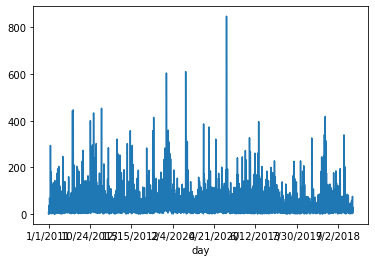

In [162]:
twitter_data_by_date.plot()

In [163]:
# twitter_data['day'] = twitter_data['created_datetime'].apply(lambda x: "%d" % (x.day))
# twitter_data['day_week_year'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.day, x.week, x.year))

In [164]:
type(twitter_data_by_date)

pandas.core.series.Series

In [165]:
twitter_data_by_date_df = twitter_data_by_date.to_frame()
twitter_data_by_date_df.columns

RangeIndex(start=0, stop=1, step=1)

In [166]:
twitter_data_by_date_df.columns =['count']
# twitter_data_by_date_df['date'] = twitter_data_by_date_df['count']
twitter_data_by_date_df

,count
day,
1/1/2011,1
1/1/2012,11
1/1/2013,6
1/1/2014,14
1/1/2015,8
...,...
9/9/2016,36
9/9/2017,4
9/9/2018,6


In [167]:
twitter_data_by_date_df.reset_index(inplace=True)
twitter_data_by_date_df

,day,count
0,1/1/2011,1
1,1/1/2012,11
2,1/1/2013,6
3,1/1/2014,14
4,1/1/2015,8
...,...,...
3678,9/9/2016,36
3679,9/9/2017,4
3680,9/9/2018,6
3681,9/9/2019,11


In [168]:
twitter_data_by_date_df['day']

0       1/1/2011
1       1/1/2012
2       1/1/2013
3       1/1/2014
4       1/1/2015
          ...   
3678    9/9/2016
3679    9/9/2017
3680    9/9/2018
3681    9/9/2019
3682    9/9/2020
Name: day, Length: 3683, dtype: object

In [169]:
twitter_data_by_date_df['count']

0        1
1       11
2        6
3       14
4        8
        ..
3678    36
3679     4
3680     6
3681    11
3682    28
Name: count, Length: 3683, dtype: int64

In [170]:
# fig, axs = plt.subplots(figsize=(12, 4))
# twitter_data_by_date_df.plot.bar(x="day", y="count", color='blue');

# Group By Week

In [172]:
twitter_data['week'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d" % (x.week, x.year))
twitter_data

<ipython-input-172-89644f6d144e>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  twitter_data['week'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d" % (x.week, x.year))
<ipython-input-172-89644f6d144e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['week'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d" % (x.week, x.year))


,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed,created_datetime,day,week
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...",2021-04-01 00:50:05+00:00,4/1/2021,13/2021
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...",2021-03-31 23:54:00+00:00,3/31/2021,13/2021
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...",2021-03-31 23:47:40+00:00,3/31/2021,13/2021
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00,3/31/2021,13/2021
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...",2021-03-31 23:29:07+00:00,3/31/2021,13/2021
...,...,...,...,...,...,...,...,...
157159,2011-01-02T23:43:44.000Z,21713283799056384,53215424,@womarmd - Just watching right now... as I am not convinced yet on solar... $FSLR needs to hold...,"['womarmd', 'watch', 'right', 'convinc', 'yet', 'solar', 'fslr', 'need', 'hold', 'jaso', 'break'...",2011-01-02 23:43:44+00:00,1/2/2011,52/2011
157160,2011-01-02T16:06:34.000Z,21598232073216001,100592354,SHORT BUSt - Scope L: entries on high SS interest names $ADS $BBBB $CIEN $CTCT $FSLR $PWER ...,"['short', 'bust', 'scope', 'l', 'entri', 'high', 'ss', 'interest', 'name', 'ad', 'bbbb', 'cien',...",2011-01-02 16:06:34+00:00,1/2/2011,52/2011
157161,2011-01-02T06:33:22.000Z,21453981167394816,100592354,SOLARS - Auriga USA research on sector is very good. Top FA names $SOLR $TSL may not be top ST ...,"['solar', 'auriga', 'usa', 'research', 'sector', 'good', 'top', 'fa', 'name', 'solr', 'tsl', 'ma...",2011-01-02 06:33:22+00:00,1/2/2011,52/2011
157162,2011-01-02T00:16:28.000Z,21359133609431040,162521687,Stochastic Crossover: this stock may rally - $FSLR - http://www.dojispace.com/stock-picks/first-...,"['stochast', 'crossov', 'stock', 'may', 'ralli', 'fslr', 'httpwwwdojispacecomstockpicksfirstsola...",2011-01-02 00:16:28+00:00,1/2/2011,52/2011


In [173]:
twitter_data_by_week = twitter_data.groupby(['week']).size()
twitter_data_by_week

week
1/2011     80
1/2012    339
1/2013    371
1/2014    518
1/2015     72
         ... 
9/2017    209
9/2018    211
9/2019    103
9/2020    233
9/2021    232
Length: 533, dtype: int64

In [178]:
twitter_data_by_week_df = twitter_data_by_week.to_frame()
twitter_data_by_week_df.columns =['count']
twitter_data_by_week_df


,count
week,
1/2011,80
1/2012,339
1/2013,371
1/2014,518
1/2015,72
...,...
9/2017,209
9/2018,211
9/2019,103


In [179]:
twitter_data_by_week_df.reset_index(inplace=True)
twitter_data_by_week_df

,week,count
0,1/2011,80
1,1/2012,339
2,1/2013,371
3,1/2014,518
4,1/2015,72
...,...,...
528,9/2017,209
529,9/2018,211
530,9/2019,103
531,9/2020,233


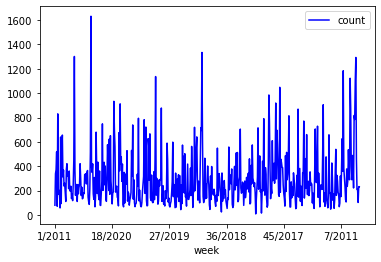

<Figure size 216x216 with 0 Axes>

In [186]:
twitter_data_by_week_df.plot(x="week", y="count", color='blue', );


In [184]:
twitter_data_by_week_df['company'] = 'first_solar'
twitter_data_by_week_df

,week,count,company
0,1/2011,80,first_solar
1,1/2012,339,first_solar
2,1/2013,371,first_solar
3,1/2014,518,first_solar
4,1/2015,72,first_solar
...,...,...,...
528,9/2017,209,first_solar
529,9/2018,211,first_solar
530,9/2019,103,first_solar
531,9/2020,233,first_solar


<Figure size 1080x432 with 0 Axes>

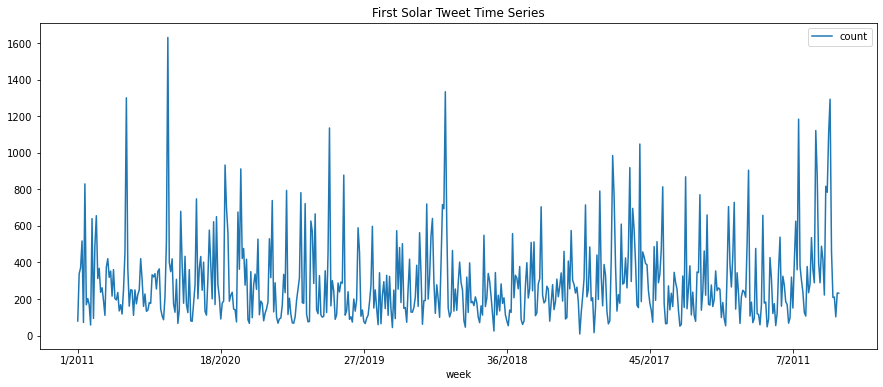

In [189]:
plt.figure(figsize=(15,6))
df1 = twitter_data_by_week_df.set_index('week') # setting "Years" as index
fig,ax = plt.subplots(figsize=(15,6))
df1.plot(kind='line',ax=ax)
plt.title("First Solar Tweet Time Series")
plt.show()